# Polinomal RegresyonÖzellik Mühendisliği ve Polinom Regresyon Genel Bakış

![](image/FeatureEngLecture.PNG)

Kutudan çıktığı haliyle, doğrusal regresyon şu formdaki modelleri oluşturmak için bir yöntem sağlar:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1} $$

Peki ya özellikleriniz/verileriniz doğrusal değilse veya özelliklerin kombinasyonlarıysa? Örneğin, konut fiyatları genellikle yaşam alanıyla doğrusal bir ilişki göstermez, ancak çok küçük veya çok büyük evleri cezalandırarak yukarıdaki grafikte gösterilen eğrilere neden olur. Bu eğriyi oturtmak için doğrusal regresyonun mekanizmasını nasıl kullanabiliriz? Hatırlayalım, elimizdeki 'mekanizma', (1) denklemindeki $\mathbf{w}$ ve $\mathbf{b}$ parametrelerini eğitim verilerine uyacak şekilde değiştirme yeteneğidir. Ancak (1) denklemindeki $\mathbf{w}$ ve $\mathbf{b}$'yi ne kadar ayarlasak da, doğrusal olmayan bir eğriye uygun bir çözüm elde edemeyiz.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
np.set_printoptions(precision=2)  

Yukarıda, verilerin doğrusal olmadığını düşündüğümüz bir senaryoyu ele alıyorduk. Şimdiye kadar öğrendiklerimizi kullanarak bir doğrusal olmayan eğriyi uydurmayı deneyelim. Basit bir ikinci dereceden denklemle başlayalım:$y=1+x^{2}$

In [2]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing


def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X : (ndarray): Shape (m,n) matrix of examples with multiple features
      w : (ndarray): Shape (n)   parameters for prediction   
      b : (scalar):              parameter  for prediction   
    Returns
      cost: (scalar)             cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i],w) + b       
        cost = cost + (f_wb_i - y[i])**2              
    cost = cost/(2*m)                                 
    return(np.squeeze(cost)) 

def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """
    m,n = X.shape
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw

def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)


Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


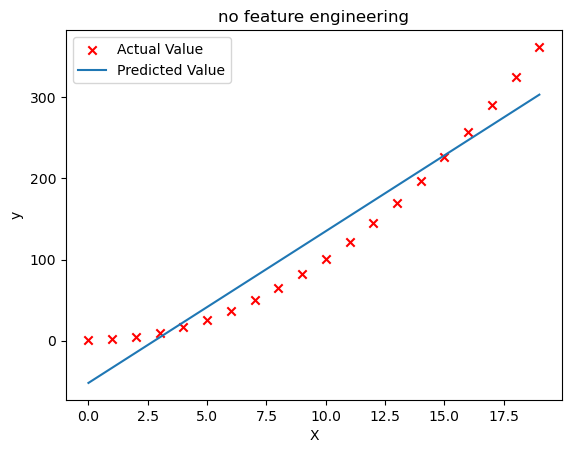

In [3]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Beklendiği gibi, pek iyi bir uyum olmadı. Gerekli olan şey, \(y = w_0x_0^2 + b\) gibi bir **polinom özellik**.

Bunu başarmak için, gerekli özellikleri oluşturmak adına *girdi verilerini* değiştirebilirsiniz. Eğer $x$ değerini karesiyle değiştirilmiş bir versiyonu ile değiştirirseniz, \(y = w_0x_0^2 + b\) denklemine ulaşabilirsiniz. 

Haydi deneyelim. Aşağıda `X`'i `X**2` ile değiştirin.


Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


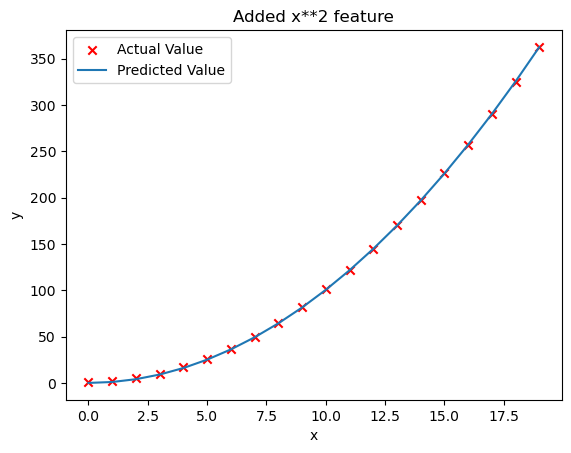

In [4]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature

X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Harika! Neredeyse mükemmel bir uyum sağlandı. Grafiğin hemen üstünde yazdırılan $mathbf{w}$ ve $b$ değerlerine dikkat edin: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent, $mathbf{w},b$ için başlangıç değerlerimizi (1.0, 0.049) olarak değiştirdi ve modeli $y=1*x_0^2+0.049$ şeklinde belirledi. Bu, hedefimiz olan $y=1*x_0^2+1$ denklemine oldukça yakın.

Eğer daha uzun süre çalıştırırsanız, daha iyi bir eşleşme elde edebilirsiniz.


## Özellik Seçimi
Yukarıda, $x^2$ teriminin gerekli olduğunu biliyorduk. Ancak, hangi özelliklerin gerekli olduğu her zaman açık olmayabilir. Potansiyel olarak yararlı özelliklerin bir çeşitliliğini ekleyerek en faydalı olanı bulmayı deneyebilirsiniz. 

Örneğin, şu ifadeyi deneseydik ne olurdu: $y = w_0x_0 + w_1x_1^2 + w_2x_2^3 + b$ ?

Sonraki hücreleri çalıştırın.



Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


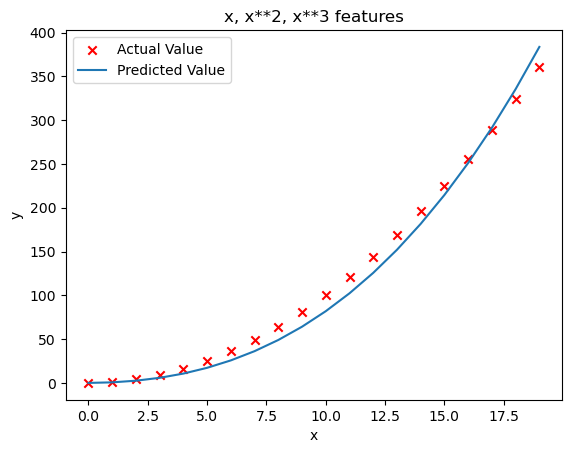

In [5]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

$\mathbf{w}$ değerine dikkat edin: `[0.08 0.54 0.03]` ve $b$ değeri `0.0106`. Bu, eğitme/uydurma işleminden sonra modelin şu şekilde olduğunu gösterir: $0.08x + 0.54x^2 + 0.03x^3 + 0.0106$

Gradient descent, $w_1$ terimini diğerlerine göre artırarak $x^2$ verilerine en iyi uyan veriyi vurgulamıştır. Çok uzun bir süre çalıştırırsanız, diğer terimlerin etkisini azaltmaya devam eder.  
> Gradient descent, ilişkili parametresini vurgulayarak bizim için 'doğru' özellikleri seçiyor.

Bu fikri gözden geçirelim:  
- Daha düşük ağırlık değeri, özelliğin daha az önemli/doğru olduğunu gösterir. Ağırlık sıfıra veya sıfıra çok yakın bir değere ulaştığında, bu özellik modelin verilere uydurulması için kullanışlı değildir.  
- Yukarıda, eğitme işleminden sonra $x^2$ özelliği ile ilişkili ağırlık, $x$ veya $x^3$ için olan ağırlıklardan çok daha büyüktür. Bunun nedeni, $x^2$'nin verileri uydurmada en faydalı olmasıdır.


### Alternatif Bir Bakış Açısı

Yukarıda, polinom özellikler, hedef verilere ne kadar iyi uyduklarına göre seçildi. Bunun başka bir düşünce yolu, yeni özellikler oluşturduktan sonra hâlâ doğrusal regresyon kullanıyor olmamızdır. Bu göz önüne alındığında, en iyi özellikler, hedef verilerle doğrusal bir ilişkiye sahip olanlardır. 

Bu durumu en iyi şekilde bir örnekle anlayabiliriz.


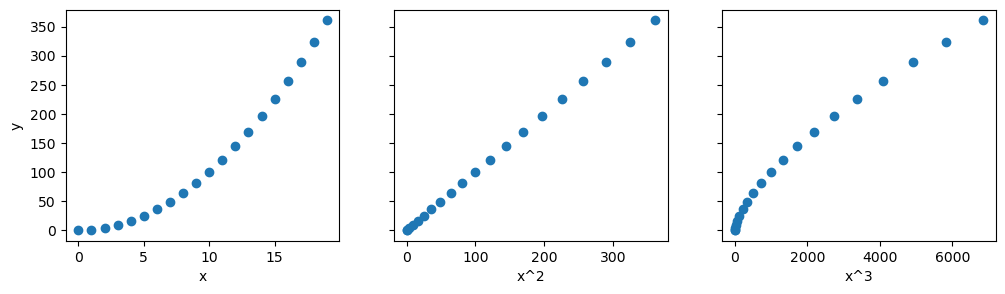

In [6]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Yukarıda, $x^2$ özelliğinin hedef değer $y$ ile karşılaştırıldığında doğrusal olduğu açıktır. Doğrusal regresyon, bu özelliği kullanarak kolayca bir model oluşturabilir.


## Özellik Ölçekleme

Veri seti önemli ölçüde farklı ölçeklere sahip özelliklere sahipse, gradient descent'i hızlandırmak için özellik ölçekleme uygulanmalıdır. Yukarıdaki örnekte, $x$, $x^2$ ve $x^3$ vardır ve bunlar doğal olarak çok farklı ölçeklere sahip olacaktır. Örneğimizi Z-puanı normalizasyonu (Z-score normalization) uygulayalım.


In [7]:
def zscore_normalize_features(X,rtn_ms=False):
    """
    returns z-score normalized X by column
    Args:
      X : (numpy array (m,n)) 
    Returns
      X_norm: (numpy array (m,n)) input normalized by column
    """
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma      

    if rtn_ms:
        return(X_norm, mu, sigma)
    else:
        return(X_norm)
    

In [8]:
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


Şimdi, daha agresif bir $\alpha$değeriyle tekrar deneyebiliriz:


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


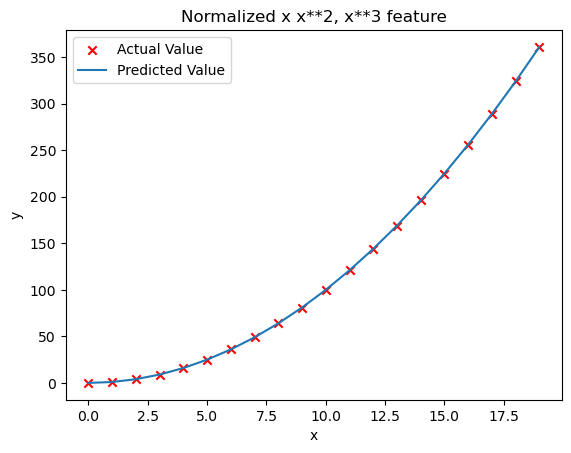

In [9]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Özellik ölçekleme, bu işlemin çok daha hızlı bir şekilde yakınsamasını sağlar.  
Yine, $\mathbf{w}$ değerlerine dikkat edin. $w_1$ terimi, yani $x^2$ terimi en çok vurgulanan terimdir. Gradient descent, $x^3$ terimini neredeyse tamamen ortadan kaldırmıştır.


### Karmaşık Fonksiyonlar

Özellik mühendisliği ile, oldukça karmaşık fonksiyonlar bile modellenebilir:


Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


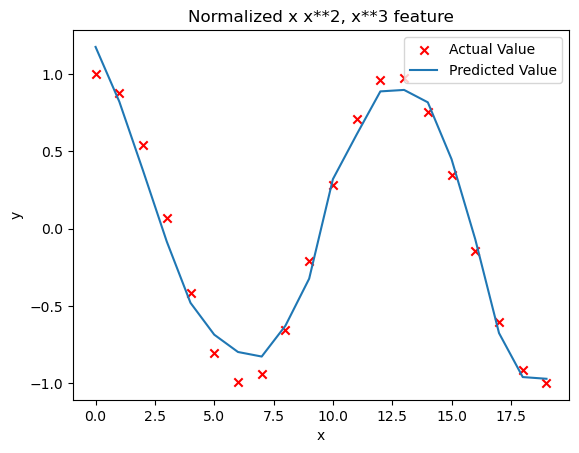

In [10]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
